# Upward inference
In this jupyter notebook we will show simple example upward inference in [Logical Neural Networks](https://github.com/IBM/LNN) (LNN).

## The basics
Before we start with upward inference example in LNN we will describe the idea behind it. In simple case of one [*logical formula*](https://en.wikipedia.org/wiki/First-order_logic#Formulas) with [*logical implication*](https://en.wikipedia.org/wiki/Truth_table#Logical_implication) the upward inference is evaluation of the *operator* given all the *operands*.

Every logical implication is evaluated based on its *truth table* which can be seen below.
![implication_tt](images/implication_tt.png)

So if we want to evaluate formula $P(x) \implies Q(x)$ in so called [First-order logic](https://en.wikipedia.org/wiki/First-order_logic) we first have to evaluate operands $P(x)$ and $Q(x)$. Lets say that $P(x)$, $Q(x)$ will be evaluated to $True$, $False$ respectively. The last step will be evaluation implication operand with given operands $True \implies False$, which is $False$ according the truth table above.

![upward_inference](images/upward_inference.png)

How did we get the value for $P$ and $Q$? The $P$ and $Q$ are so called [*predicates*](https://en.wikipedia.org/wiki/Predicate_%28mathematical_logic%29) which can be described with following table. We always evaluate predicate for [*constant*](https://en.wikipedia.org/wiki/Non-logical_symbol), in our case `a`. Later we will see specific example. So in the first row, we see our constants, in the two middle columns truth values for both predicates given specific constant is displayed and the last column contains truth value of evaluated formula with given predicates and given constant.

![predicate_tt](images/predicate_tt.png)


## Grecian domain

Now we are ready to move to our specific example and finally create some LNN model. We usually start with formulation of our problem in natural language, that will define our *domain*.

* Grecians are mortal.<br>
* Zeus is a grecian, is not mortal.<br>
* Socrates is a grecian, is mortal.<br>
* Confucius is not a grecian, is mortal.<br>
* Great Pyramid of Giza is not grecian, is not mortal.

What we can see in this domain? We have set of *objects* `{Zeus, Socrates, Confucius, Great Pyramid of Giza}`. These objects can be related in some way. One example is `Zeus is a grecian`. Formally this relation can be represented as predicate in First-order logic. So except objects we can see two predicates `grecian` and `mortal`. Finally we can translate word `are` as logical implication, since if object is `grecian` it will be `mortal` (atlest accordin to our domain).

Situation can be described by following table:

![grecian_tt](images/grecian_tt.png)

## Definition of LNN model

Now we can continue with our LNN model definition.

First we will create an empty model.

In [1]:
from lnn import Model

model = Model()

Define our predicates and add them to the model. Note we add predicates as formulae. That is right, since predicate can be understand as atomic formula.

In [2]:
from lnn import Predicate

grecian = Predicate(name="grecian")
mortal = Predicate(name="mortal")

model.add_formulae(grecian, mortal)

Now we create one free variable and use it in definition of our implication `grecians_are_mortals`, which is later added into our model.

In [3]:
from lnn import Variable, Implies

x = Variable("x")

grecians_are_mortals = Implies(grecian(x), mortal(x), name="grecians_are_mortals")

model.add_formulae(grecians_are_mortals)

Last thing is adding so called *facts* into our model. Facts are objects which were mentioned above.

In [4]:
from lnn import Fact

model.add_facts(
    {
        "grecian": {
            "Great Pyramid of Giza": Fact.FALSE,
            "Confucius": Fact.FALSE,
            "Zeus": Fact.TRUE,
            "Socrates": Fact.TRUE,
        },
        "mortal": {
            "Great Pyramid of Giza": Fact.FALSE,
            "Confucius": Fact.TRUE,
            "Zeus": Fact.FALSE,
            "Socrates": Fact.TRUE,
        },
    }
)


### Upward inference inside LNN model

Before we start upward inference we can explore our created model. Since formulae and its operands can be represented in syntax tree (graph) we can plot it. We will see three nodes, two of them corresponds to our predicates and third to our implication.

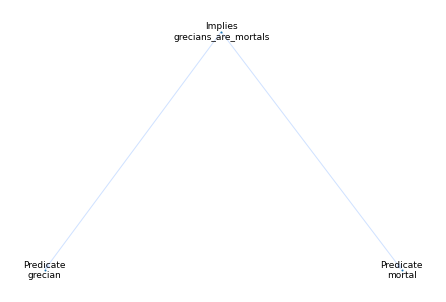

In [5]:
from lnn.utils import plot_graph

plot_graph(model)

Now we have everything ready for upward inference. The "upward" in the name comes from the direction in which inference go through syntax tree of the formula. In our case, we will start from atoms (two predicates in our case) and compute truth bounds for each subformula (implication in our case).

In [6]:
from lnn import Direction

steps, facts_inferred = model.infer(direction=Direction.UPWARD)

Result of upward inference can be seen here. We can verify it with our table:

![grecian_tt](images/grecian_tt.png)

In [7]:
model["grecians_are_mortals"].print()

OPEN   Implies: grecians_are_mortals(x) 
'Great Pyramid of Giza'                                     TRUE (1.0, 1.0)
'Confucius'                                                 TRUE (1.0, 1.0)
'Zeus'                                                     FALSE (0.0, 0.0)
'Socrates'                                                  TRUE (1.0, 1.0)

